# Image similarity with Turicreate

Try turicreat's image similarity with differents parameters. This takes times, better resize images before.

https://apple.github.io/turicreate/docs/userguide/image_similarity/

! IMPORTANT ! Create a new environement with requierments in 'turicreate_requierments.txt'

*Classify image by similarity, then construct a supervised classifier ? How strong is this model ? what do parameters change ?*

In [2]:
import turicreate as tc

In [13]:
# choose folder

reference_data  = tc.image_analysis.load_images('', recursive=False, ignore_failure=True, with_path=True)
reference_data = reference_data.add_row_number()

In [ ]:
# save to frame or load frame, and visualize

#reference_data.save('XXX.sframe')
#reference_data = tc.load_sframe('XXX.sframe')
reference_data.to_dataframe()

In [15]:
# create model with frame

#reference_data['deep_features'] = tc.image_analysis.get_deep_features(reference_data['image'], model_name="squeezenet_v1.1")
#del reference_data['image']    # allow images to be garbage collected
#model = tc.image_similarity.create(reference_data, feature='deep_features', model="squeezenet_v1.1")
model = tc.image_similarity.create(reference_data, verbose=True)

Downloading base mlmodel

Downloading https://docs-assets.developer.apple.com/turicreate/models/resnet-50-TuriCreate-6.0.mlmodel to /var/folders/90/gg1g_k612pb71qlx3dq87dfr0000gn/T/model_cache/resnet-50.mlmodel

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 15.28s       | 10%              |

| 128              | 26.55s       | 20%              |

| 192              | 36.68s       | 30%              |

| 256              | 48.54s       | 40%              |

| 320              | 58.69s       | 50%              |

| 448              | 1m 18s       | 70%              |

| 512              | 1m 30s       | 80%              |

| 576              | 1m 41s       | 90%              |

| 634              | 1m 53s       | 100%             |

+------------------+--------------+------------------+

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [16]:
model

Class                                    : ImageSimilarityModel

Schema
------
Number of examples                       : 634
Number of feature columns                : 1
Input image shape                        : (3, 224, 224)

Training summary
----------------
Training time (sec)                      : 152.7405

In [17]:
# query result (try different k or use radius, see documentation)
# https://apple.github.io/turicreate/docs/api/generated/turicreate.image_similarity.ImageSimilarityModel.query.html?highlight=query#turicreate.image_similarity.ImageSimilarityModel.query

query_results = model.query(reference_data, k=10, verbose=True)
query_results.head()

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 12.46s       | 10%              |

| 128              | 24.37s       | 20%              |

| 192              | 39.51s       | 30%              |

| 256              | 51.43s       | 40%              |

| 320              | 1m 2s        | 50%              |

| 448              | 1m 24s       | 70%              |

| 512              | 1m 36s       | 80%              |

| 576              | 1m 48s       | 90%              |

| 634              | 1m 58s       | 100%             |

+------------------+--------------+------------------+

Starting blockwise querying.

max rows per data block: 6207

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 634          | 100806  | 25.0789     | 348.879ms    |

| Done         | 401956  | 100         | 385.975ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,0,1.1680077279964342e-06,1
0,460,14.182533072507269,2
0,180,14.905517148735717,3
0,520,15.304712533837954,4
0,305,15.333919944917925,5
0,589,15.449500773870776,6
0,9,15.483126776941885,7
0,577,15.72685821553835,8
0,270,15.785434972902669,9
0,546,16.145486306903784,10


In [18]:
query_results['distance']

dtype: float
Rows: 6340
[1.1680077279964342e-06, 14.182533072507269, 14.905517148735717, 15.304712533837954, 15.333919944917925, 15.449500773870776, 15.483126776941885, 15.72685821553835, 15.785434972902669, 16.145486306903784, 1.5078914929239175e-06, 12.26514996288903, 15.915483512320458, 16.846219210474132, 17.179530181370165, 17.4227200899134, 17.441795540271514, 17.52381819141233, 17.54916035902076, 17.561839890755977, 1.3486991523486091e-06, 17.83716529075054, 17.889788136507846, 18.122560668874478, 18.94281088134647, 19.092312405368766, 19.09386333007113, 19.192764715009677, 19.301273360041847, 19.37262074207189, 0.0, 15.282676434199583, 16.73290706798805, 16.813609084408572, 17.117324594126664, 17.21218527803793, 17.220961407315013, 17.311699654037028, 17.326953440030383, 17.38896708565447, 1.7841612752790171e-06, 15.808725579521976, 16.73549820415392, 16.845807870831294, 16.95737795591576, 17.078820840514407, 17.14304861624387, 17.433493169121782, 17.637836223118196, 17.6815046

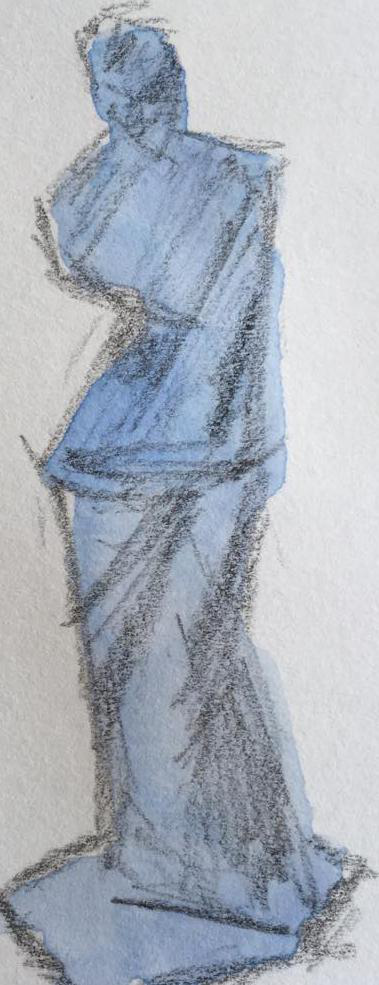

In [36]:
# see which image to choose

reference_data[70]['image'].show()

In [ ]:
# get similar images, and display it

similar_rows = query_results[query_results['query_label'] == 70]['reference_label']
reference_data.filter_by(similar_rows, 'id').explore()

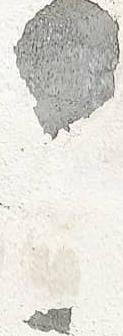

In [38]:
reference_data[493]['image'].show()

In [30]:
# get similarity graph

similarity_graph = model.similarity_graph(k=10, output_type='SGraph')
similarity_graph.edges

Starting blockwise similarity graph construction.

max rows per data block: 6207

number of reference data blocks: 4

+---------+-------------+--------------+

| # Pairs | % Complete. | Elapsed Time |

+---------+-------------+--------------+

| 75050   | 29.6863     | 154.276ms    |

| 252810  | 100         | 336.816ms    |

+---------+-------------+--------------+

__src_id,__dst_id,distance,rank
476,482,12.143324428494441,2
476,532,12.842260907560066,4
482,499,8.996316459358788,2
499,482,8.996316459358788,1
501,391,14.511131985319967,2
501,241,16.07864333003257,10
504,419,19.629959815787778,2
513,196,9.272474331203176,2
532,482,11.999993988820822,3
532,476,12.842260907560066,7
